<a href="https://colab.research.google.com/github/wanickols01/LearningMLandDL/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [2]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k # How many we want
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0) # Random generate income
        ageCentroid = np.random.uniform(20.0, 70.0) # random age
        for j in range(int(pointsPerCluster)): 
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)]) # for every point we'll create a fake point
            y.append(i) # append actual cluster number to y
    X = np.array(X) # convert to array
    y = np.array(y)
    return X, y

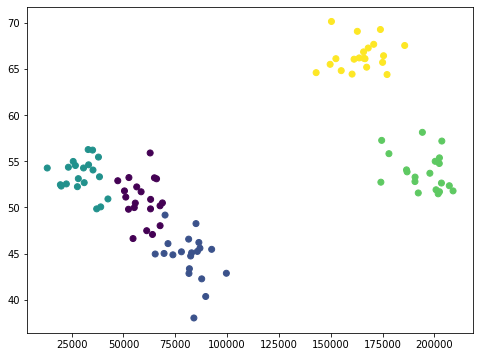

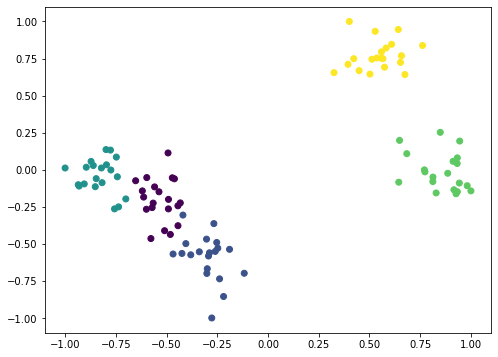

In [3]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5) # 100 points in 5 clusters

#Create plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

#normalize data 
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X) # there is also inverse scale if you need to get back
X = scaling.transform(X)

#plot result scale
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [17]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='rbf', C=C).fit(X, y) #specify kernal


By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

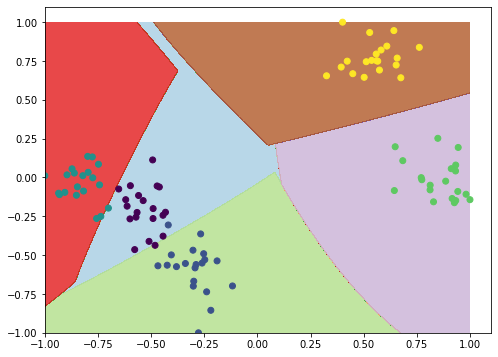

In [18]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)
    
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

In [9]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [10]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?